<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GARCH-model" data-toc-modified-id="GARCH-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GARCH model</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-Datasets" data-toc-modified-id="Set-up-the-Datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up the Datasets</a></span></li><li><span><a href="#Visualisation-of-the-Data" data-toc-modified-id="Visualisation-of-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualisation of the Data</a></span></li><li><span><a href="#Visualisation-of-the-Volatility" data-toc-modified-id="Visualisation-of-the-Volatility-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisation of the Volatility</a></span></li><li><span><a href="#Visualisation-of-PACF" data-toc-modified-id="Visualisation-of-PACF-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualisation of PACF</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Rolling-Forecast-the-Origin" data-toc-modified-id="Rolling-Forecast-the-Origin-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Rolling Forecast the Origin</a></span></li></ul></li></ul></div>

In [18]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings

warnings.filterwarnings('ignore')

# GARCH model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

## Set up the Datasets

In [4]:
rd.seed(45)

n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

# gaus(mu, std) generate normal distribution of mean 0 and std 1.
series = [rd.gauss(0,1), rd.gauss(0,1)]
print(series)
vols = [1, 1]

for _ in range(n):
    # 
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = rd.gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

[-0.1585453577042199, 1.146226359576811]


## Visualisation of the Data

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

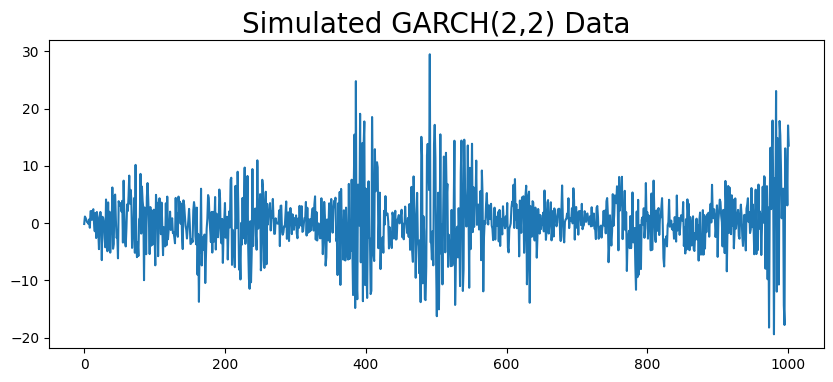

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

## Visualisation of the Volatility

Text(0.5, 1.0, 'Data Volatility')

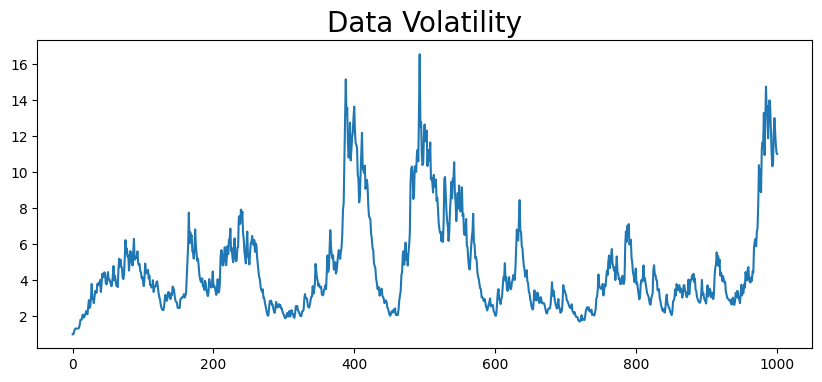

In [6]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

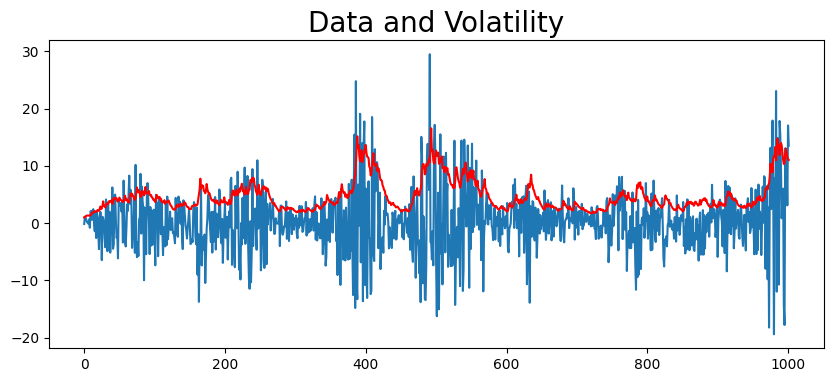

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## Visualisation of PACF

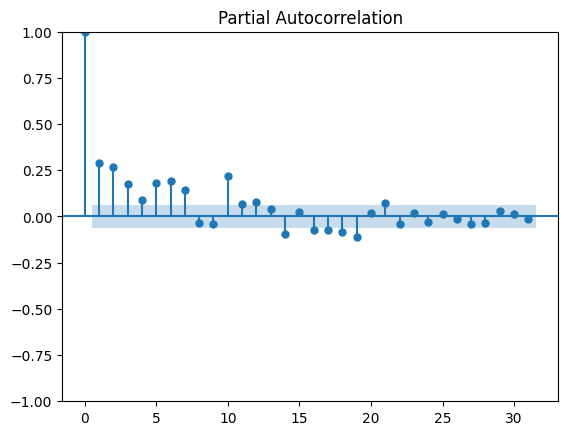

In [8]:
# Partial AutoCorrelation function is a method to see the direct correlation.
# between the past variables. On the parameter 3 it seems that the value kind-off.
# shut-off after param 2 thus that's the reason why choosing q,p = 2.

plot_pacf(np.array(series)**2)
plt.show()

In [9]:
train, test = series[:-test_size], series[-test_size:]

In [10]:
model = arch_model(train, p=2, q=2)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 45022.76791271455
Iteration:      2,   Func. Count:     17,   Neg. LLF: 89045.18883921271
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2784.263124274045
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2549.942009950699
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2527.6782766792435
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2524.8752954591846
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2523.818762069552
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2527.975260496129
Iteration:      9,   Func. Count:     75,   Neg. LLF: 2524.5059868216467
Iteration:     10,   Func. Count:     84,   Neg. LLF: 2523.7576260234555
Iteration:     11,   Func. Count:     91,   Neg. LLF: 2523.7573046068565
Iteration:     12,   Func. Count:     98,   Neg. LLF: 2523.7572908449724
Iteration:     13,   Func. Count:    105,   Neg. LLF: 2523.757289789317
Iteration:     14,   Func. Count:    111,   Neg. LLF: 2523

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2523.76
Distribution:                  Normal   AIC:                           5059.51
Method:            Maximum Likelihood   BIC:                           5088.34
                                        No. Observations:                  902
Date:                Tue, Jul 04 2023   Df Residuals:                      901
Time:                        14:17:33   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1209      0.103      1.176      0.240 [-8.068e-02,  0.323]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6747      0.213      3.173  1.506e-03    [  0.258,  1.091]
alpha[1]       0.1323  4.148e-02      3.190  1.424e-03  [5.101e-02,  0.214]
alpha[2]       0.2298  5.094e-02      4.511  6.451e-06    [  0.130,  0.330]
beta[1]        0.1766      0.133      1.328      0.184 [-8.405e-02,  0.437]
beta[2]        0.4537      0.113      4.000  6.336e-05    [  0.231,  0.676]
===========================================================================

Covariance estimator: robust
"""

## Prediction

In [13]:
predictions = model_fit.forecast(horizon=test_size)

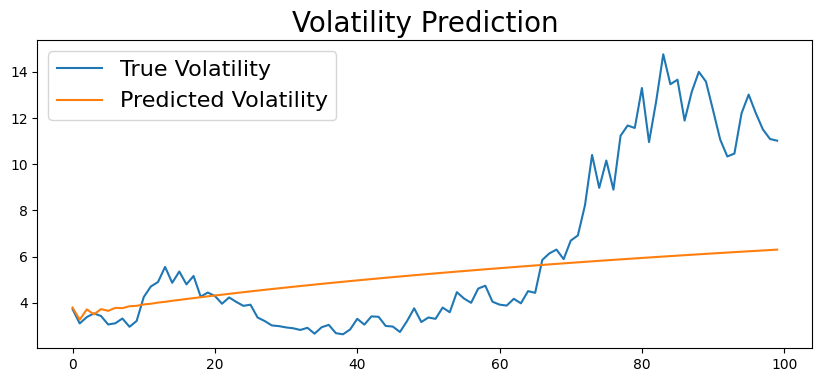

In [14]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

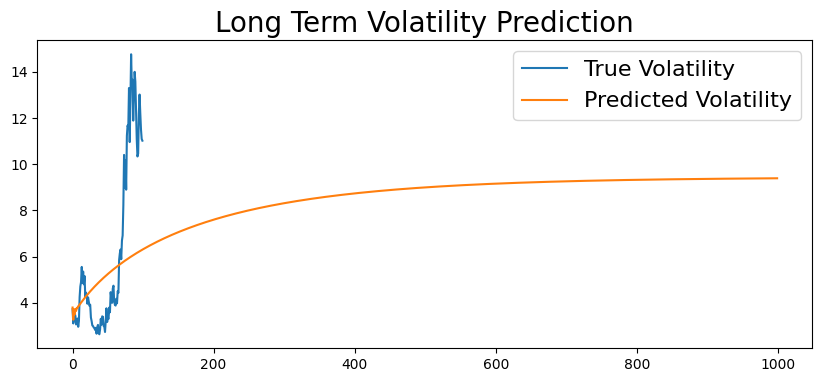

In [15]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast the Origin

In [16]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

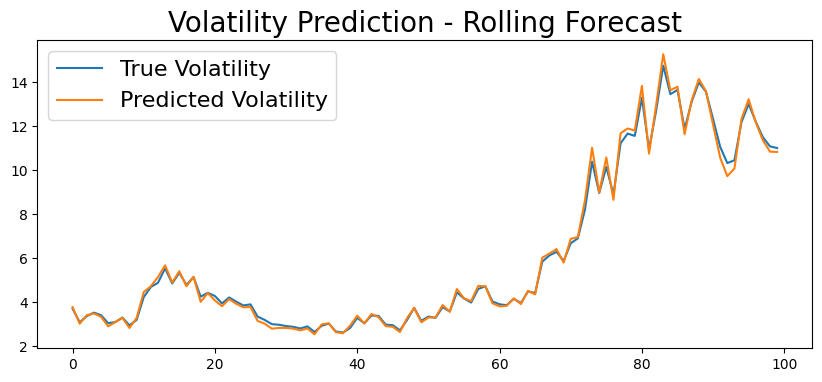

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)